In [286]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [287]:
fn = 'data_cruz.csv'
data = np.genfromtxt(fn)
file_size = os.path.getsize(fn)
print data.shape
print file_size

(35861, 2)
905485


In [288]:
from scipy.interpolate import UnivariateSpline
def expandVector(a):
    old_indices = np.arange(0,len(a))
    new_length = len(data)
    new_indices = np.linspace(0,len(a)-1,new_length)
    spl = UnivariateSpline(old_indices,a,k=3,s=0)
    new_array = spl(new_indices)
    return new_array

In [289]:
data = np.array([d for d in data if not d[1] == 0]) # we don't care about neutral tweets
print len(data)

N = int(len(data)*0.1)
print N
data_smooth = np.convolve(data[:,1], np.ones((N,))/N, mode='same')
tweets_per_second_smooth = np.convolve(1/np.diff(data[:,0]), np.ones((N,))/N, mode='same')

data_25percentile = np.empty(len(data)/N)
data_75percentile = np.empty(len(data)/N)
for i in range(len(data[::N])-1):
    data_25percentile[i] = np.percentile(data[i*N:(i+1)*N,1], 25)
    data_75percentile[i] = np.percentile(data[i*N:(i+1)*N,1], 75)

data_25percentile = expandVector(data_25percentile)
data_75percentile = expandVector(data_75percentile)

24776
2477


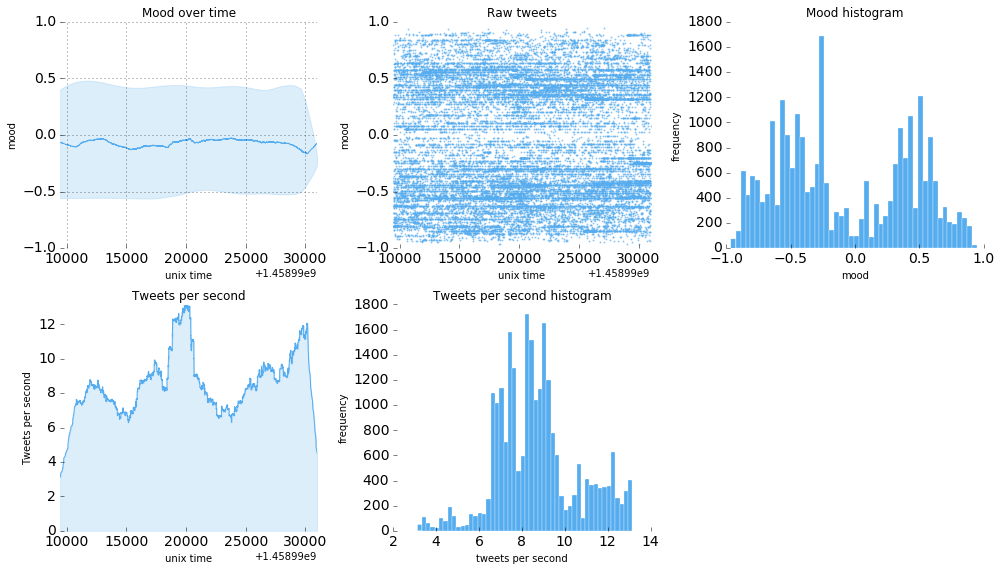

In [290]:
plt.figure(figsize=(14,8))

ax = plt.subplot(231)
plt.title('Mood over time')
plt.plot(data[:,0], data_smooth, color='#55acee')
ax.fill_between(data[:,0], data_75percentile, data_25percentile, alpha=0.2, color='#55acee')
plt.ylabel('mood')
plt.xlabel('unix time')
plt.ylim([-1, 1])
plt.grid('on')
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([data[0,0],data[-1,0]])

ax = plt.subplot(232)
plt.title('Raw tweets')
plt.scatter(data[:,0], data[:,1], s=1, color='#55acee', alpha=0.5)
plt.ylabel('mood')
plt.xlabel('unix time')
plt.ylim([-1, 1])
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([data[0,0],data[-1,0]])

ax = plt.subplot(233)
plt.title('Mood histogram')
plt.hist(data[:,1], 50, edgecolor='w', linewidth=0.3, color='#55acee')
plt.ylabel('frequency')
plt.xlabel('mood')
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.subplot(234)
ax.set_title('Tweets per second')
ax.plot(data[:-1,0], tweets_per_second_smooth, color='#55acee')
ax.fill_between(data[:-1,0], tweets_per_second_smooth, [0]*len(tweets_per_second_smooth), alpha=0.2, color='#55acee')
ax.set_ylabel('Tweets per second')
ax.set_xlabel('unix time')
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0, np.max(tweets_per_second_smooth)])
plt.xlim([data[0,0],data[-1,0]])

ax = plt.subplot(235)
plt.title('Tweets per second histogram')
plt.hist(tweets_per_second_smooth, 50, edgecolor='w', linewidth=0.3, color='#55acee')
plt.ylabel('frequency')
plt.xlabel('tweets per second')
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.tight_layout()
plt.show()